In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter

In [247]:
df_raw = pd.read_csv("dropout_rate.csv", sep=";", encoding="utf-8-sig")

In [248]:
df_raw.shape

(4424, 37)

In [249]:
df_raw

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [250]:
df_raw.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [251]:
df = df_raw.copy()

summary_stats = {
    " ": [
        "Mean",
        "Min",
        "25th Percentile",
        "Median",
        "75th Percentile",
        "Max",
        "Mode",
        "Variance",
        "Standard Deviation",
        "Coefficient of Variation",
        "IQR"
    ]
}

quantitative_cols = [
    "Application order",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)",
    "Previous qualification (grade)",
    "Admission grade",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

def create_summary_df(df, quantitative_cols):
    for col in quantitative_cols:
        data = df[col]
        mean_val = data.mean()
        std_val = data.std()
        mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
        variance_val = data.var()
        cv_val = std_val / mean_val if mean_val != 0 else np.nan

        summary_stats[col] = [
            mean_val,
            data.min(),
            data.quantile(0.25),
            data.median(),
            data.quantile(0.75),
            data.max(),
            mode_val,
            variance_val,
            std_val,
            cv_val,
            data.quantile(0.75) - data.quantile(0.25)
        ]

    formatted_summary_df = pd.DataFrame(summary_stats).copy()

    for col in formatted_summary_df.columns[1:]:  # Skip "Thông số thống kê"
        formatted_summary_df[col] = formatted_summary_df[col].apply(lambda x: f'{x:,.4f}' if isinstance(x, (int, float)) else x)

    return formatted_summary_df

formatted_summary_df = create_summary_df(df, quantitative_cols)
formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)
formatted_summary_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17040\2207655265.py:72: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)


,,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,Mean,1.7278,23.2651,0.71,6.2706,8.2991,4.7066,0.1377,0.5418,6.2321,8.0633,4.4358,0.1503,132.6133,126.9781,10.6408,10.2302,11.5661,1.228,0.002
1,Min,0,17,0,0,0,0,0,0,0,0,0,0,95,95,0,0,7.6,-0.8,-4.06
2,25th Percentile,1,19,0,5,6,3,0,0,5,6,2,0,125,117.9,11,10.75,9.4,0.3,-1.7
3,Median,1,20,0,6,8,5,0,0,6,8,5,0,133.1,126.1,12.2857,12.2,11.1,1.4,0.32
4,75th Percentile,2,25,0,7,10,6,0,0,7,10,6,0,140,134.8,13.4,13.3333,13.9,2.6,1.79
5,Max,9,70,20,26,45,26,12,19,23,33,20,12,190,190,18.875,18.5714,16.2,3.7,3.51
6,Mode,1,18,0,6,8,6,0,0,6,8,6,0,133.1,130,0,0,7.6,1.4,0.32
7,Variance,1.7261,57.5749,5.572,6.1513,17.4649,9.5743,0.4773,3.6808,4.8222,15.5863,9.0888,0.5682,173.9321,209.7283,23.4611,27.1525,7.0961,1.9119,5.1526
8,Standard Deviation,1.3138,7.5878,2.3605,2.4802,4.1791,3.0942,0.6909,1.9185,2.196,3.948,3.0148,0.7538,13.1883,14.482,4.8437,5.2108,2.6639,1.3827,2.2699
9,Coefficient of Variation,0.7604,0.3261,3.3247,0.3955,0.5036,0.6574,5.0188,3.5409,0.3524,0.4896,0.6796,5.0146,0.0994,0.1141,0.4552,0.5094,0.2303,1.126,"1,152.95"


In [252]:
cols = [
    ' ',
    'Application order', 
    'Age at enrollment', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (grade)',
]

#formatted_summary_df[cols].to_csv("stat_dropout_rate.csv")

In [253]:
formatted_summary_df[cols]

,,Application order,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,Mean,1.7278,23.2651,4.7066,10.6408,4.4358,10.2302
1,Min,0,17,0,0,0,0
2,25th Percentile,1,19,3,11,2,10.75
3,Median,1,20,5,12.2857,5,12.2
4,75th Percentile,2,25,6,13.4,6,13.3333
5,Max,9,70,26,18.875,20,18.5714
6,Mode,1,18,6,0,6,0
7,Variance,1.7261,57.5749,9.5743,23.4611,9.0888,27.1525
8,Standard Deviation,1.3138,7.5878,3.0942,4.8437,3.0148,5.2108
9,Coefficient of Variation,0.7604,0.3261,0.6574,0.4552,0.6796,0.5094


In [254]:
# Bỏ Enrolled
df_bin_target = df_raw[df_raw['Target'] != 'Enrolled'].copy()

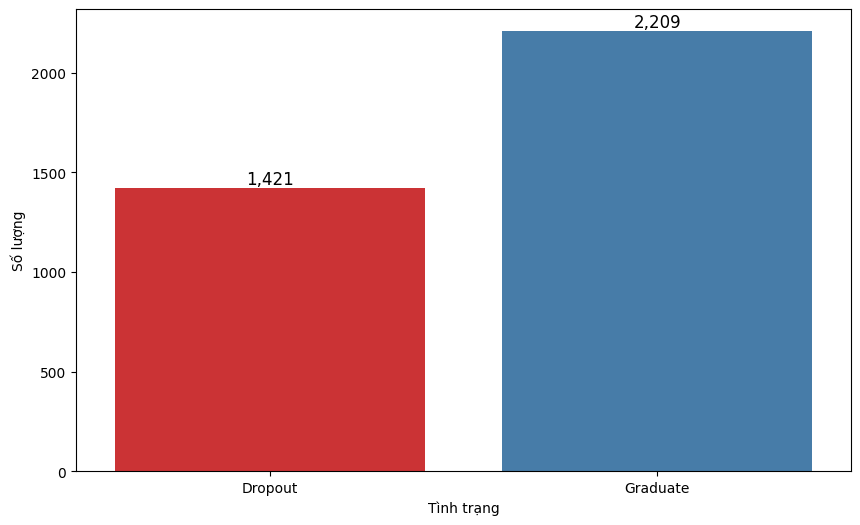

In [255]:
# plot Target
plt.figure(figsize=(10, 6))
sns.countplot(data=df_bin_target, x='Target', hue='Target',legend=False, palette='Set1', hue_order=['Dropout', 'Graduate'])

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{int(p.get_height()):,}', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Tình trạng')
plt.ylabel('Số lượng')
plt.show()

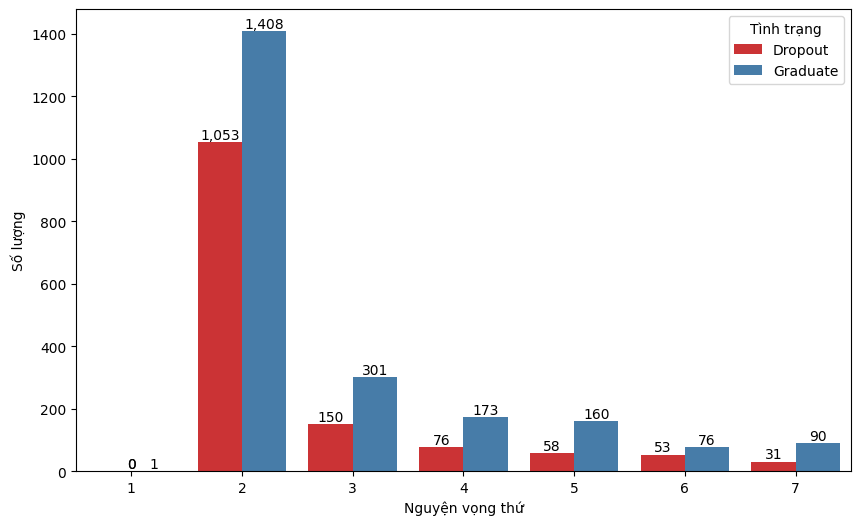

In [256]:
plt.figure(figsize=(10, 6))
df_bin_target_temp = df_bin_target.copy()
df_bin_target_temp['Application order'] = df_bin_target_temp['Application order'] + 1
sns.countplot(data=df_bin_target_temp, x='Application order', hue='Target', palette='Set1', hue_order=['Dropout', 'Graduate'])


for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{int(p.get_height()):,}', 
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Nguyện vọng thứ')
plt.ylabel('Số lượng')
plt.legend(title='Tình trạng', loc='upper right')
plt.show()

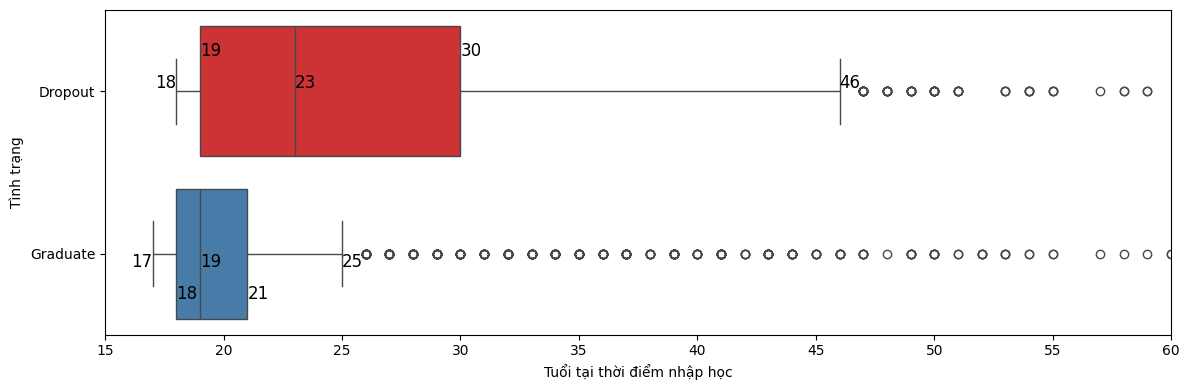

In [257]:
grouped = df_bin_target.groupby('Target')['Age at enrollment']
quartiles = grouped.quantile([0.25, 0.5, 0.75]).unstack()
quartiles.columns = ['Q1', 'Median', 'Q3']
quartiles['IQR'] = quartiles['Q3'] - quartiles['Q1']

whisk = {}
for lvl, row in quartiles.iterrows():
    data = df_bin_target.loc[df_bin_target['Target']==lvl, 'Age at enrollment']
    lower_bound = row['Q1'] - 1.5 * row['IQR']
    upper_bound = row['Q3'] + 1.5 * row['IQR']
    lower_whisk = data[data >= lower_bound].min()
    upper_whisk = data[data <= upper_bound].max()
    whisk[lvl] = (lower_whisk, upper_whisk)

fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(
    data=df_bin_target,
    y='Target',
    x='Age at enrollment',
    hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    orient='h',
    ax=ax
)
ax.set_ylabel('Tình trạng')
ax.set_xlabel('Tuổi tại thời điểm nhập học')

hue_levels = ['Dropout', 'Graduate']
y_offsets = [-0.05, 0.05]   

for i, lvl in enumerate(hue_levels):
    q1, med, q3 = quartiles.loc[lvl, ['Q1','Median','Q3']]
    wlow, whigh = whisk[lvl]
    y = i

    ax.text(q1 ,  y + y_offsets[i] * 5, f"{q1:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})
    ax.text(med , y + y_offsets[i], f"{med:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})
    ax.text(q3 ,  y + y_offsets[i]* 5, f"{q3:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})

    ax.text(wlow ,  y + y_offsets[i], f"{wlow:.0f}",
            va='center', ha='right', fontdict={'fontsize': 12})
    ax.text(whigh , y + y_offsets[i], f"{whigh:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})

ax.set_xlim(15, 60)

plt.tight_layout()
plt.show()


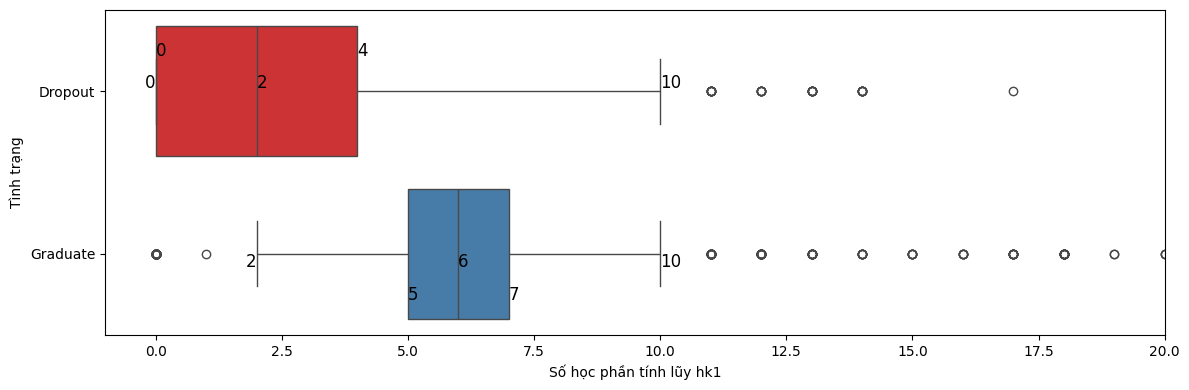

In [258]:
grouped = df_bin_target.groupby('Target')['Curricular units 1st sem (approved)']
quartiles = grouped.quantile([0.25, 0.5, 0.75]).unstack()
quartiles.columns = ['Q1', 'Median', 'Q3']
quartiles['IQR'] = quartiles['Q3'] - quartiles['Q1']

whisk = {}
for lvl, row in quartiles.iterrows():
    data = df_bin_target.loc[df_bin_target['Target']==lvl, 'Curricular units 1st sem (approved)']
    lower_bound = row['Q1'] - 1.5 * row['IQR']
    upper_bound = row['Q3'] + 1.5 * row['IQR']
    lower_whisk = data[data >= lower_bound].min()
    upper_whisk = data[data <= upper_bound].max()
    whisk[lvl] = (lower_whisk, upper_whisk)

fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(
    data=df_bin_target,
    y='Target',
    x='Curricular units 1st sem (approved)',
    hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    orient='h',
    ax=ax
)
ax.set_ylabel('Tình trạng')
ax.set_xlabel('Số học phần tính lũy hk1')

hue_levels = ['Dropout', 'Graduate']
y_offsets = [-0.05, 0.05]   

for i, lvl in enumerate(hue_levels):
    q1, med, q3 = quartiles.loc[lvl, ['Q1','Median','Q3']]
    wlow, whigh = whisk[lvl]
    y = i

    ax.text(q1 ,  y + y_offsets[i] * 5, f"{q1:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})
    ax.text(med , y + y_offsets[i], f"{med:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})
    ax.text(q3 ,  y + y_offsets[i]* 5, f"{q3:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})

    ax.text(wlow ,  y + y_offsets[i], f"{wlow:.0f}",
            va='center', ha='right', fontdict={'fontsize': 12})
    ax.text(whigh , y + y_offsets[i], f"{whigh:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})

ax.set_xlim(-1, 20)

plt.tight_layout()
plt.show()


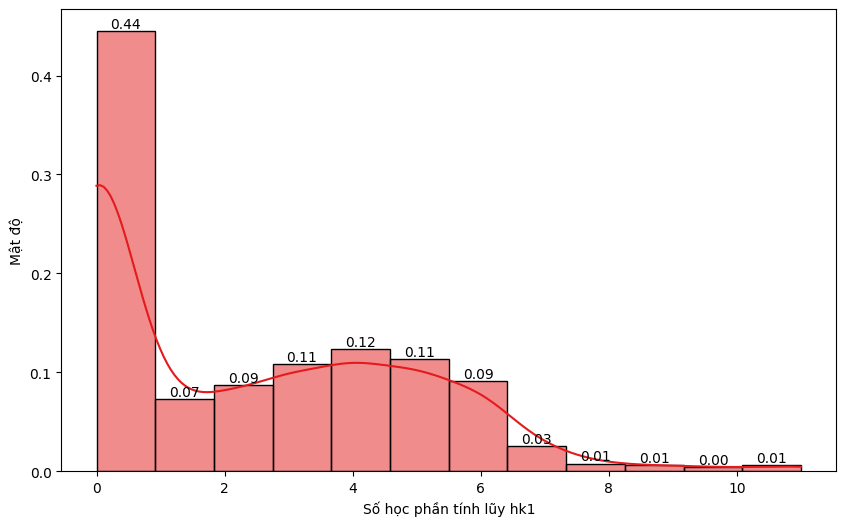

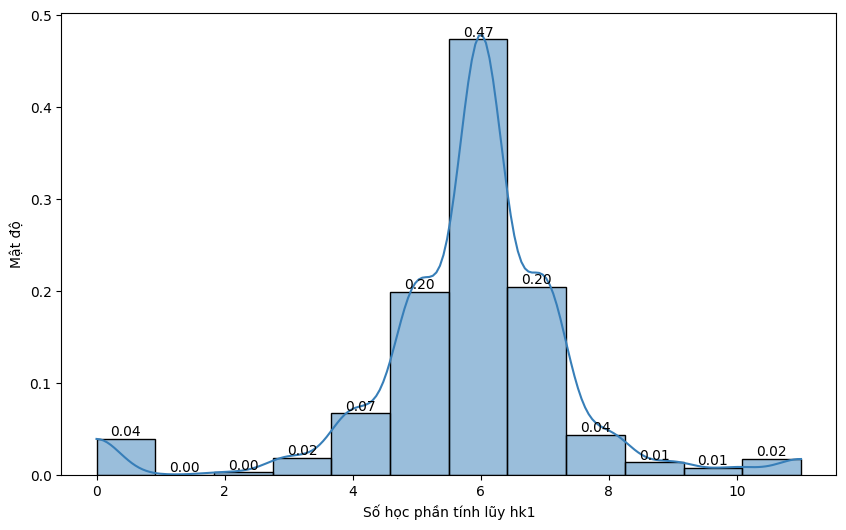

In [259]:

plt.figure(figsize=(10, 6))
df_bin_target_temp = df_bin_target[(df_bin_target['Target'] == 'Dropout') & (df_bin_target['Curricular units 1st sem (approved)'] <= 11)].copy()

sns.histplot(
    data=df_bin_target_temp,
    x='Curricular units 1st sem (approved)',
    hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Số học phần tính lũy hk1')
plt.ylabel('Mật độ')
plt.show()



plt.figure(figsize=(10, 6))
df_bin_target_temp = df_bin_target[(df_bin_target['Target'] == 'Graduate') & (df_bin_target['Curricular units 1st sem (approved)'] <= 11)].copy()

sns.histplot(
    data=df_bin_target_temp,
    x='Curricular units 1st sem (approved)',
    hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Số học phần tính lũy hk1')
plt.ylabel('Mật độ')
plt.show()

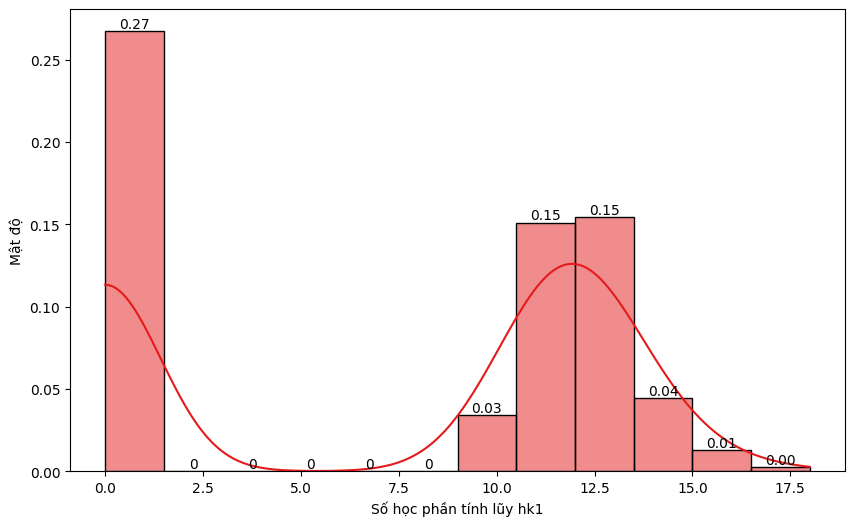

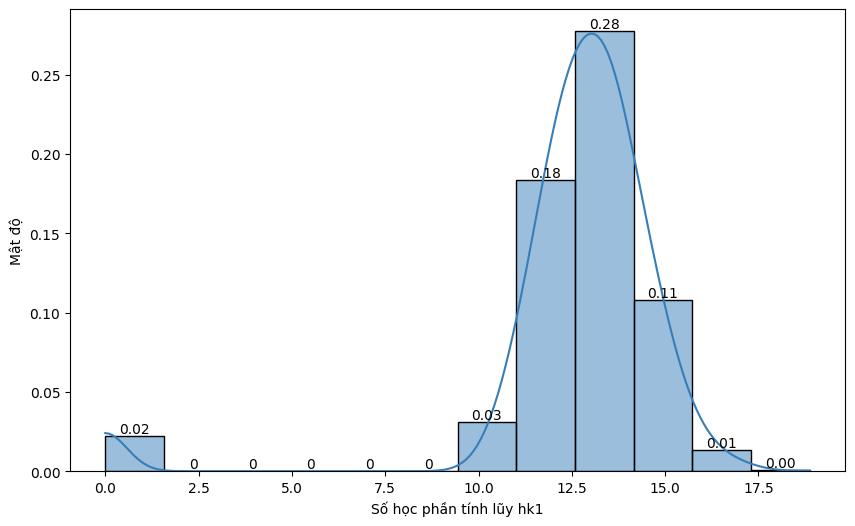

In [260]:

plt.figure(figsize=(10, 6))
df_bin_target_temp = df_bin_target[(df_bin_target['Target'] == 'Dropout')].copy()

sns.histplot(
    data=df_bin_target_temp,
    x='Curricular units 1st sem (grade)',
    hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Số học phần tính lũy hk1')
plt.ylabel('Mật độ')
plt.show()



plt.figure(figsize=(10, 6))
df_bin_target_temp = df_bin_target[(df_bin_target['Target'] == 'Graduate') ].copy()

sns.histplot(
    data=df_bin_target_temp,
    x='Curricular units 1st sem (grade)',
    hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Số học phần tính lũy hk1')
plt.ylabel('Mật độ')
plt.show()

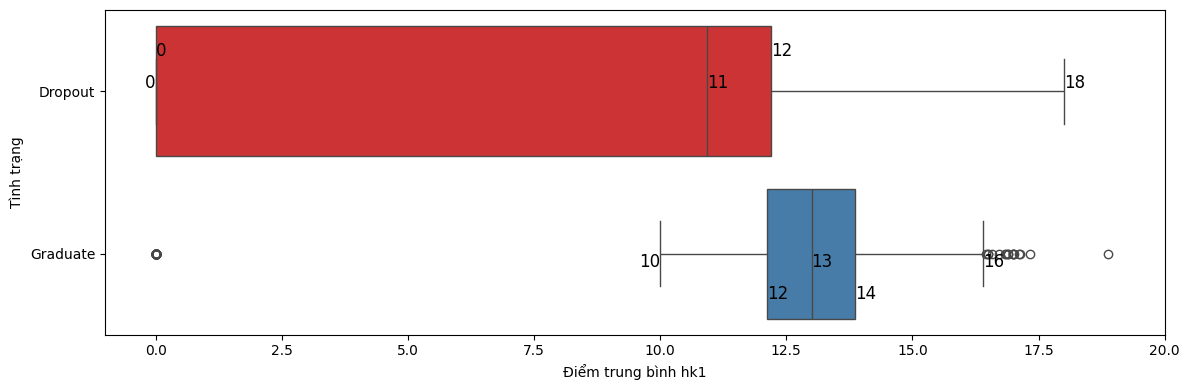

In [261]:
grouped = df_bin_target.groupby('Target')['Curricular units 1st sem (grade)']
quartiles = grouped.quantile([0.25, 0.5, 0.75]).unstack()
quartiles.columns = ['Q1', 'Median', 'Q3']
quartiles['IQR'] = quartiles['Q3'] - quartiles['Q1']

whisk = {}
for lvl, row in quartiles.iterrows():
    data = df_bin_target.loc[df_bin_target['Target']==lvl, 'Curricular units 1st sem (grade)']
    lower_bound = row['Q1'] - 1.5 * row['IQR']
    upper_bound = row['Q3'] + 1.5 * row['IQR']
    lower_whisk = data[data >= lower_bound].min()
    upper_whisk = data[data <= upper_bound].max()
    whisk[lvl] = (lower_whisk, upper_whisk)

fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(
    data=df_bin_target,
    y='Target',
    x='Curricular units 1st sem (grade)',
    hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    orient='h',
    ax=ax
)
ax.set_ylabel('Tình trạng')
ax.set_xlabel('Điểm trung bình hk1')

hue_levels = ['Dropout', 'Graduate']
y_offsets = [-0.05, 0.05]   

for i, lvl in enumerate(hue_levels):
    q1, med, q3 = quartiles.loc[lvl, ['Q1','Median','Q3']]
    wlow, whigh = whisk[lvl]
    y = i

    ax.text(q1 ,  y + y_offsets[i] * 5, f"{q1:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})
    ax.text(med , y + y_offsets[i], f"{med:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})
    ax.text(q3 ,  y + y_offsets[i]* 5, f"{q3:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})

    ax.text(wlow ,  y + y_offsets[i], f"{wlow:.0f}",
            va='center', ha='right', fontdict={'fontsize': 12})
    ax.text(whigh , y + y_offsets[i], f"{whigh:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})

ax.set_xlim(-1, 20)

plt.tight_layout()
plt.show()


In [262]:
def plot_heatmap_by_target(df, col1, col2, normalize='index'):
    ct = pd.crosstab(df[col1], df[col2], normalize=normalize)
    plt.figure(figsize=(7, 4))
    sns.heatmap(
        ct,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        cbar_kws={'label': 'Tỷ lệ' if normalize else 'Số lượng'},
        annot_kws={"size": 14},
    )
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.tight_layout()
    plt.show()

In [263]:
# df_bin_target in 'Tuition fees up to date' replace 1 - Đầy đủ, 0 - Nợ học phí
df_bin_target['Tuition fees up to date'] = df_bin_target['Tuition fees up to date'].replace({1: 'Đầy đủ', 0: 'Nợ học phí'})

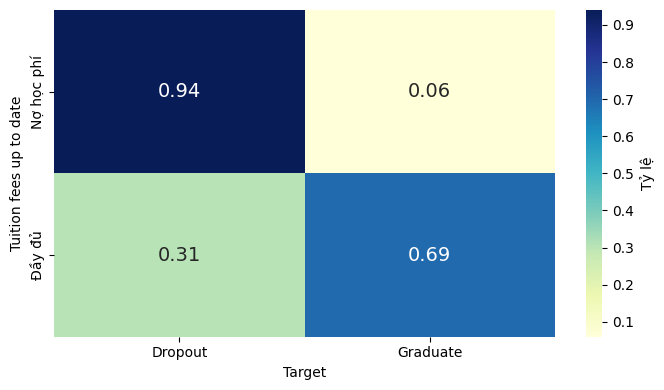

In [264]:
plot_heatmap_by_target(df_bin_target, 'Tuition fees up to date', 'Target')

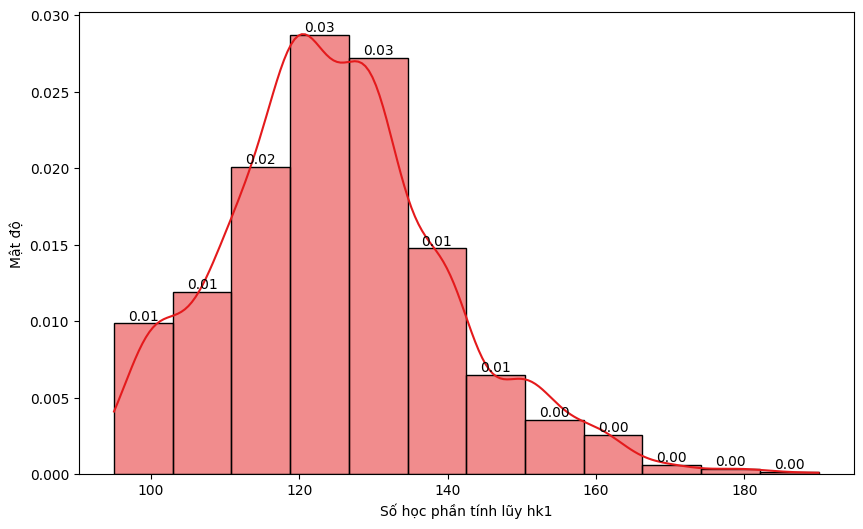

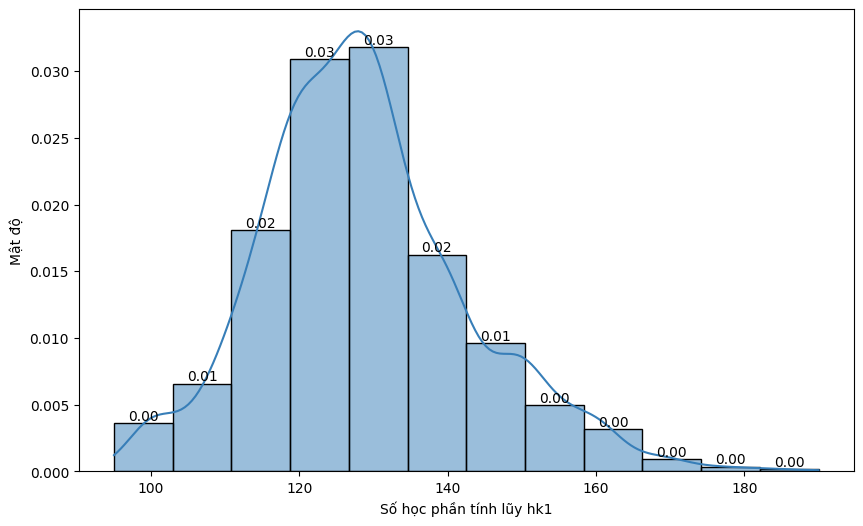

In [ ]:

plt.figure(figsize=(10, 6))
df_bin_target_temp = df_bin_target[(df_bin_target['Target'] == 'Dropout')].copy()

sns.histplot(
    data=df_bin_target_temp,
    x='Admission grade',
    hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm đầu vào')
plt.ylabel('Mật độ')
plt.show()



plt.figure(figsize=(10, 6))
df_bin_target_temp = df_bin_target[(df_bin_target['Target'] == 'Graduate')].copy()

sns.histplot(
    data=df_bin_target_temp,
    x='Admission grade',
    hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm đầu vào')
plt.ylabel('Mật độ')
plt.show()